# cpop: Detecting changes in piecewise-linear signals
## Paul Fearnhead and Daniel Grose

## Section 1

### Figure 1

### simulate data

In [1]:
library(cpop)
set.seed(1)
x <- 1:400
changepoints <- 0:7*50
y <- simchangeslope(x,changepoints=changepoints,change.slope=c(0.5,(-1)^(1:7))/5)
mu <- simchangeslope(x,changepoints=changepoints,change.slope=c(0.5,(-1)^(1:7))/5,sd=0)

Loading required package: crops

Loading required package: pacman


Attaching package: ‘cpop’


The following object is masked from ‘package:stats’:

    fitted


The following object is masked from ‘package:methods’:

    show




### implement three different methods

#### 1. cpop

In [2]:
res <- cpop(y) 

#### 2. difference data and analyse as change in mean

In [3]:
dy <- diff(y)

In [4]:
library(changepoint)
out <- cpt.mean(dy,method="PELT",penalty="CROPS",pen.value=c(1*log(399),2*2*log(399)))

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.



[1] "Maximum number of runs of algorithm = 15"
[1] "Completed runs = 2"
[1] "Completed runs = 3"
[1] "Completed runs = 5"
[1] "Completed runs = 7"
[1] "Completed runs = 9"


#### 3. trend filtering

In [5]:
library(genlasso)
out.tf <- trendfilter(y,x,ord=1)
##show two segmentations -- one based on minimising CV
cv <- cv.trendfilter(out.tf)
fit1 <- out.tf$fit[,out.tf$lambda==cv$lambda.min]
sum(abs(diff(diff(fit1)))>0.001) ##17 changes
##one based on the correct number of changes

#to find this we calculate the number of changes as we vary the penalty in trend-filtering
cps <- rep(NA,dim(out.tf$fit)[2])
for(i in 1:dim(out.tf$fit)[2]){
  cps[i] <- sum(abs(diff(diff(out.tf$fit[,i])))>0.001)
}
##inspection gives that the 38th penalty value gives 7 changes.
fit2 <- out.tf$fit[,38]

Loading required package: Matrix

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


[1] 17

In [6]:
library(ggplot2)

In [7]:
df <- data.frame("x" = x, "y" = y,"dy"=  c(NA,dy))

In [8]:
p.1 <- ggplot(data = df, aes(x = x, y = y))
p.1 <- p.1 + geom_point(alpha=0.4)
p.1 <- p.1 + geom_line(aes(y = mu), color = "blue")
p.1 <- p.1 + theme_bw()
p.1 <- p.1 + xlab("Time") + ylab("Data")

In [9]:
p.2 <- ggplot(data = df, aes(x = x, y = dy))
p.2 <- p.2 + geom_point(alpha=0.4)
p.2 <- p.2 + geom_vline(xintercept = changepoints[-1],color = "blue",linetype = "dashed")
p.2 <- p.2 + geom_vline(xintercept = cpts.full(out)[3,],color = "red",linetype = "dashed")
p.2 <- p.2 + theme_bw()
p.2 <- p.2 + xlab("Time") + ylab("First Differences")

In [10]:
p.3 <- ggplot(data = df, aes(x = x, y = y))
p.3 <- p.3 + geom_point(alpha=0.4)
p.3 <- p.3 + geom_line(aes(y = mu), color = "blue")
p.3 <- p.3 + geom_line(aes(y = fit1), color = "red")
p.3 <- p.3 + geom_vline(xintercept = changepoints[-1],color = "blue",linetype = "dashed")
p.3 <- p.3 + geom_vline(xintercept = (1:399)[abs(diff(diff(fit1)))>0.001]+1,color = "red",linetype = "dashed")
p.3 <- p.3 + theme_bw()
p.3 <- p.3 + xlab("Time") + ylab("Data")

In [11]:
p.4 <- ggplot(data = df, aes(x = x, y = y))
p.4 <- p.4 + geom_point(alpha=0.4)
p.4 <- p.4 + geom_line(aes(y = mu), color = "blue")
p.4 <- p.4 + geom_line(aes(y = fit2), color = "red")
p.4 <- p.4 + geom_vline(xintercept = changepoints[-1],color = "blue",linetype = "dashed")
p.4 <- p.4 + geom_vline(xintercept = (1:399)[abs(diff(diff(fit2)))>0.001]+1,color = "red",linetype = "dashed")
p.4 <- p.4 + theme_bw()
p.4 <- p.4 + xlab("Time") + ylab("Data")

In [12]:
library(gridExtra)

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_vline).”


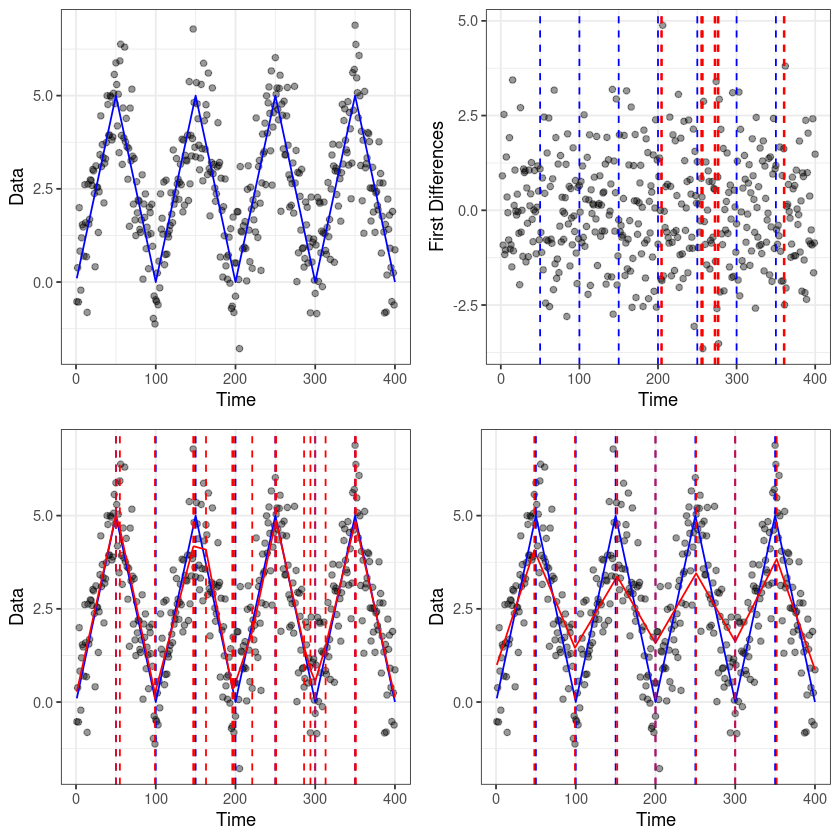

In [13]:
g <- grid.arrange(p.1,p.2,p.3,p.4 ,nrow = 2,ncol=2)

In [14]:
ggsave(file="change_in_slope_examples_ggplot.pdf", g)

Saving 6.67 x 6.67 in image



## Section 3.1

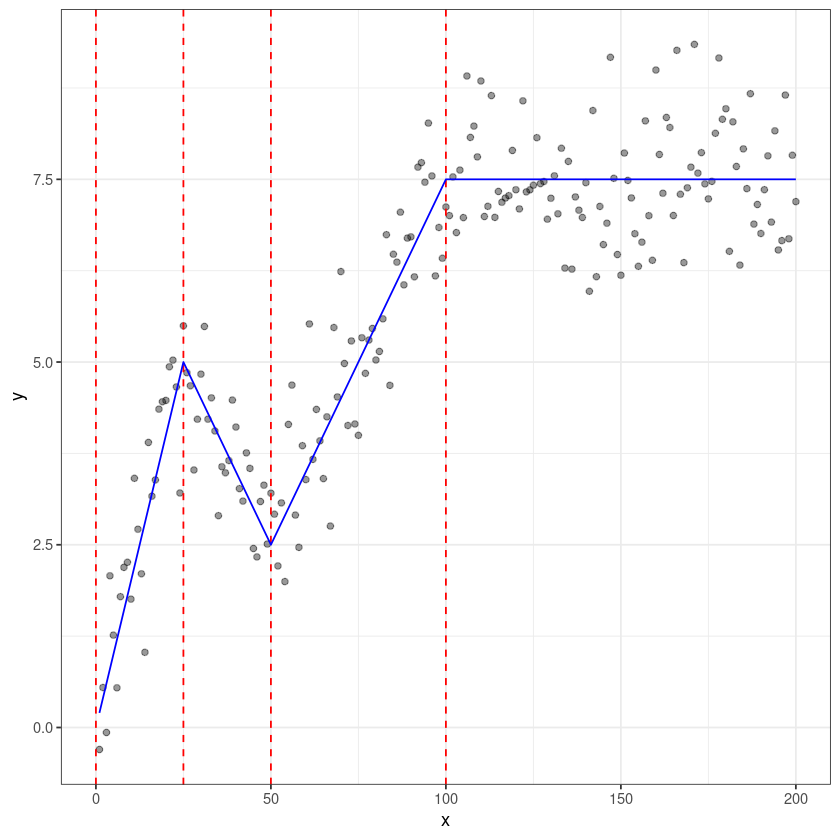

In [15]:
set.seed(1)
changepoints <- c(0, 25, 50, 100)
change.slope <- c(0.2, -0.3, 0.2, -0.1)
x <- 1:200
sd <- 0.8
y <- simchangeslope(x, changepoints, change.slope, sd) #simulate data
df <- data.frame("x" = x, "y" = y)
p <- ggplot(data = df, aes(x = x, y = y))
p <- p + geom_point(alpha=0.4)
p <- p + geom_vline(xintercept = changepoints, color = "red",  linetype = "dashed")

#for the plot: obtain the true mean function by setting sd=0.
mu <- simchangeslope(x, changepoints, change.slope, sd = 0)
p <- p + geom_line(aes(y = mu), color = "blue")
p <- p + theme_bw()
print(p)

### Figure 2

In [16]:
ggsave(file="simulate_example_ggplot.pdf",p)

Saving 6.67 x 6.67 in image



## Section 3.2

In [17]:
##analysis by cpop
res <- cpop(y, x, sd = 0.8)
summary(res)


cpop analysis with n = 200 and penalty (beta)  = 10.59663

3  changepoints detected at x = 
 22 52 95
fitted values : 
  x0       y0  x1       y1     gradient   intercept      RSS
1  1 0.147335  22 4.844725  0.223685242 -0.07635023 10.07761
2 22 4.844725  52 2.717661 -0.070902123  6.40457180 10.38813
3 52 2.717661  95 7.303644  0.106650750 -2.82817758 25.09463
4 95 7.303644 200 7.563413  0.002473995  7.06861408 61.78303

overall RSS = 107.3434
cost = 199.514



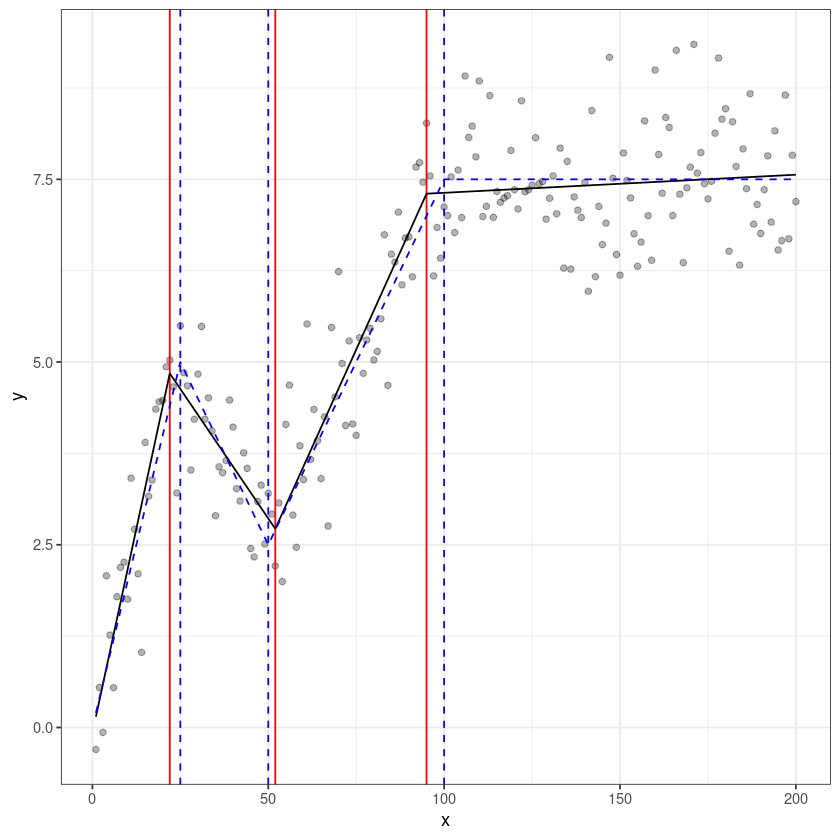

In [18]:
p <- plot(res)
p <- p + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p <- p + geom_line(aes(y = mu), color = "blue", linetype = "dashed")
print(p)

### Figure 3

In [19]:
ggsave(file="cpop_example1_ggplot.pdf",p)

Saving 6.67 x 6.67 in image



## Section 3.3

In [20]:
changepoints(res)

location
<int>
22
52
95


In [21]:
estimate(res, x = c(0.1,2.7,51.6))

x,y_hat
<dbl>,<dbl>
0.1,0.1473350
2.7,0.7289166
51.6,2.9473390


In [22]:
fitted(res)

x0,y0,x1,y1,gradient,intercept,RSS
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.147335,22,4.844725,0.223685242,-0.07635023,10.07761
22,4.844725,52,2.717661,-0.070902123,6.40457180,10.38813
52,2.717661,95,7.303644,0.106650750,-2.82817758,25.09463
95,7.303644,200,7.563413,0.002473995,7.06861408,61.78303


## Section 4.1

In [23]:
set.seed(1)
x <- (1:200)^(2)/(200) ###x-values now unevenly spaced
changepoints <- c(0, 25, 50, 100)
change.slope <- c(0.2, -0.3, 0.2, -0.1)
y <- simchangeslope(x, changepoints, change.slope, sd) #simulate data
##analysis by cpop
res <- cpop(y, x, sd = 0.8)

### Figure 4

Saving 6.67 x 6.67 in image



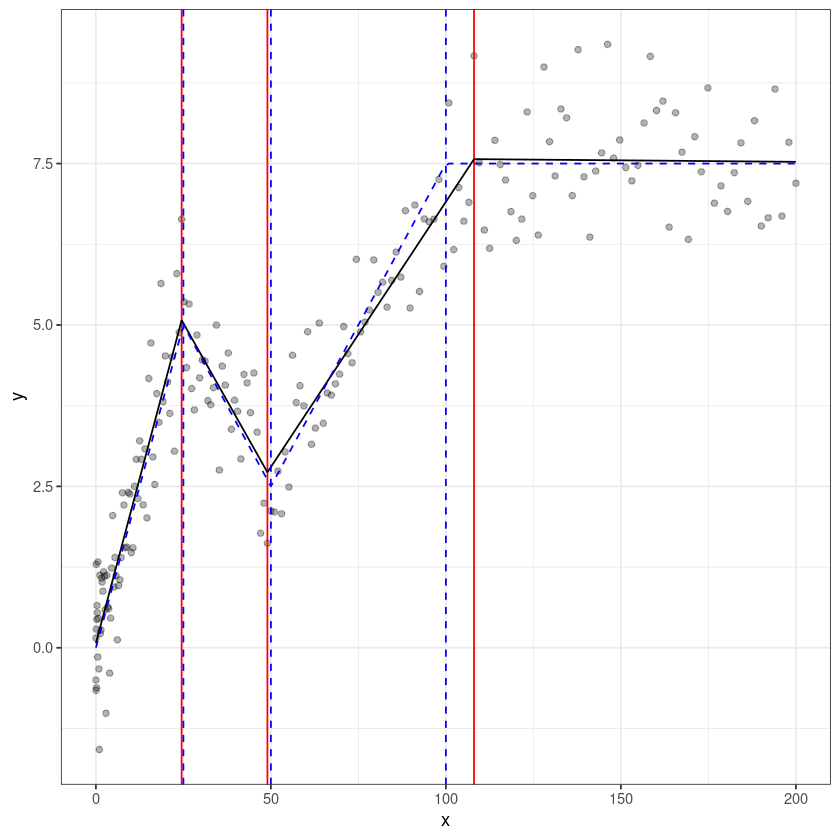

In [24]:
#for the plot: obtain the true mean function by setting sd=0.
mu <- simchangeslope(x, changepoints, change.slope, sd = 0)
p <- plot(res)
p <- p + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p <- p + geom_line(aes(y = mu), color = "blue", linetype = "dashed")
print(p)
ggsave(file="cpop_example_uneven_ggplot.pdf",p)

## Section 4.1

In [25]:
set.seed(1)
changepoints <- c(0, 25, 50, 100)
change.slope <- c(0.2, -0.3, 0.2, -0.1)
x <- 1:200 
sd <- x/100
y <- simchangeslope(x, changepoints, change.slope, sd) #simulate data
##analysis by cpop
res <- cpop(y, x, sd = sqrt(mean(sd^2)) )
#summary(res)
res.true <- cpop(y, x, sd=sd)

### Figure 5

Saving 6.67 x 6.67 in image



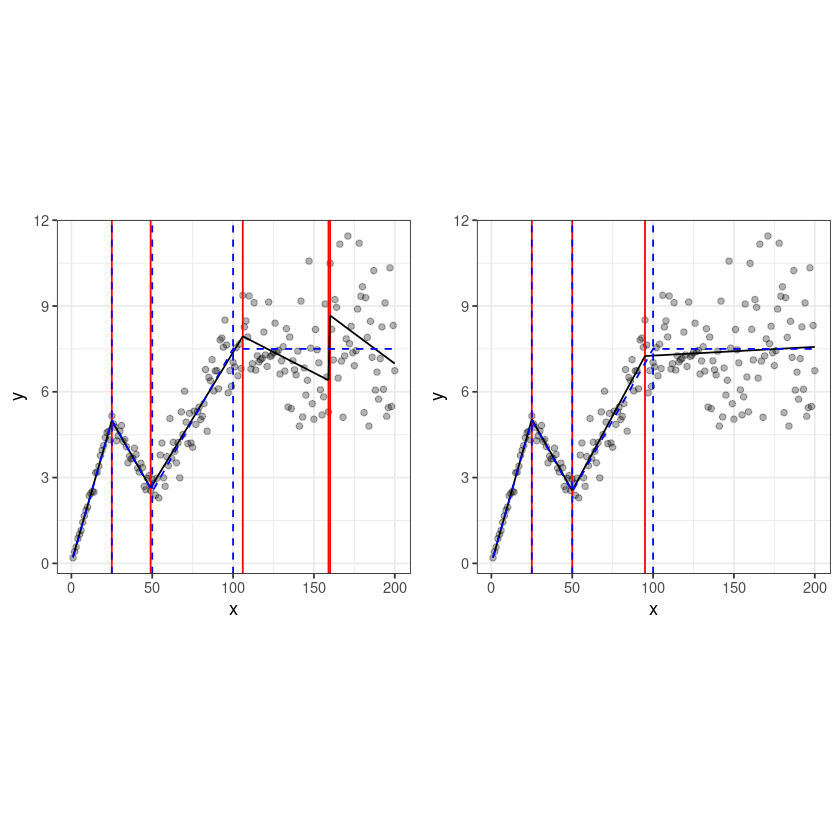

In [26]:
mu <- simchangeslope(x, changepoints, change.slope, sd = 0)
p <- plot(res)
p <- p + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p <- p + geom_line(aes(y = mu), color = "blue", linetype = "dashed")

p.true <- plot(res.true)
p.true <- p.true + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p.true <- p.true + geom_line(aes(y = mu), color = "blue", linetype = "dashed")
p <- p + theme(aspect.ratio=1/1)
p.true <- p.true + theme(aspect.ratio=1/1)
g <- grid.arrange(p,p.true,nrow=1,ncol=2)
ggsave(file="cpop_uneven_examples_ggplot.pdf",g)

## Section 4.3

In [27]:
set.seed(1)
x <- 1:6400
y <- simchangeslope(x, changepoints = 0:31*200, change.slope = c(0.05,0.1*(-1)^(1:(31))), sd = 1)

res.coarse <- cpop(y, x, grid=1:399*16, beta = 2*log(400))
cps <- unlist( changepoints(res.coarse) )

grid <- NULL
for(i in 1:length(cps)){
  grid <- c(grid, cps[i] + (-7):8 )
}

res.fine <- cpop(y, x, grid, beta = 2*log(length(x)))


### Figure 6

In [28]:
 set.seed(1)
  n.st <- 200*2^(0:5)
  ##scenario 1 -- one changepoint
  K <- 10 ##number of replications
  time1 <- matrix(NA,nrow=K,ncol=length(n.st))
  time1g <- matrix(NA,nrow=K,ncol=length(n.st))
  for(i in 1:length(n.st)){
    n <- n.st[i]
    for(k in 1:K){
      y <- simchangeslope(1:n,n/2,0.5,1)
      time1[k,i] <- (system.time(cpop(y)))[1]
      time1g[k,i] <- (system.time(cpop(y,grid=(1:n.st[1])*(n/n.st[1]))))[1]
    }
  }
  
  n.st <- 200*2^(0:5)
  ##scenario 2 -- linear increasing changepoint
  K <- 10 ##number of replications
  time2 <- matrix(NA,nrow=K,ncol=length(n.st))
  time2g <- matrix(NA,nrow=K,ncol=length(n.st))
  for(i in 1:length(n.st)){
    n <- n.st[i]
    for(k in 1:K){
      m <- 2*n/n.st[1]
      y <- simchangeslope(1:n,0:(m-1)*n/m,c(0.05,0.1*(-1)^(1:(m-1))),1)
      time2[k,i] <- (system.time(cpop(y)))[1]
      time2g[k,i] <- (system.time(cpop(y,grid=(1:n.st[1])*(n/n.st[1]))))[1]
    }
  }
#  save(time1,time2,time1g,time2g,file="/Users/paulfearnhead/Dropbox/Apps/Overleaf/JSS: CPOP/time.Rdata")
#    load("/Users/paulfearnhead/Dropbox/Apps/Overleaf/JSS: CPOP/time.Rdata")

###average the times
t1 <- apply(time1,2,mean)
t2 <- apply(time2,2,mean)
t1g <- apply(time1g,2,mean)
t2g <- apply(time2g,2,mean)

Saving 6.67 x 6.67 in image



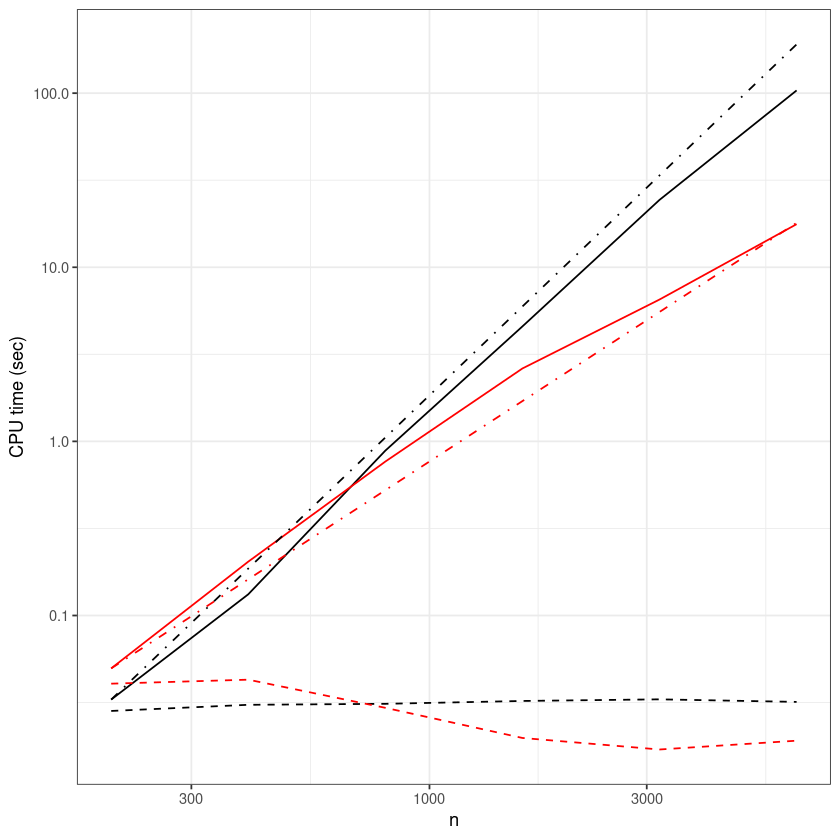

In [29]:
df <- data.frame("x" = n.st,
                "t1" = t1,
                "t2" = t2,
                "t1g" = t1g,
                "t2g" = t2g,
                "d1" = t2[1]*n.st^1.7/n.st[1]^1.7,
                "d2" = t1[1]*n.st^2.5/n.st[1]^2.5)
p <- ggplot(data = df, aes(x = x))
p <- p + geom_line(aes(y = t1))
p <- p + geom_line(aes(y = t2),color="red")
p <- p + geom_line(aes(y = t1g),linetype = "dashed")
p <- p + geom_line(aes(y = t2g),linetype = "dashed",color="red")
p <- p + geom_line(aes(y = d1),linetype = "5515",color="red")
p <- p + geom_line(aes(y = d2),linetype = "5515")
p <- p + scale_x_continuous(trans = 'log10')
p <- p + scale_y_continuous(trans = 'log10')
p <- p + xlab("n") + ylab("CPU time (sec)")
p <- p + theme_bw()
print(p)
ggsave(file="cpop_CPU_ggplot.pdf", p)

## Section 4.4

In [30]:
set.seed(1)
##simulate data as for Section 3
changepoints <- c(0, 25, 50, 100)
change.slope <- c(0.2, -0.3, 0.2, -0.1)
x <- 1:200
mu <- simchangeslope(x, changepoints, change.slope, sd = 0) #mean

##simulate data with t noise
y <- mu + rt(length(x), df = 4)
res.min <- cpop(y,x, beta=2*log(length(y)), minseglen = 10, sd = sqrt(2)) ##variance of t_d is d/(d-2)

### Figure 7

In [31]:

res <- cpop(y,x, beta=2*log(length(y)), sd = sqrt(2)) ##variance of t_d is d/(d-2)

##Now run with a minimum segment length
#res.min=cpop(y,x,beta=2*(log(length(y))),minseglen=10, sd = sqrt(4/2))
##compare CPU cost
system.time(cpop(y,x, beta=2*log(length(y)), sd = sqrt(2) ) )[1]
system.time(cpop(y,x,beta=2*(log(length(y))),minseglen=10, sd = sqrt(2) ) )[1]

##run with too large a minimum segment length
res.min40=cpop(y,x,beta=2*(log(length(y))),minseglen=40, sd = sqrt(2))
res.min30=cpop(y,x,beta=2*(log(length(y))),minseglen=30, sd = sqrt(2))



user.self 
    0.035

user.self 
    0.592

In [32]:
p.1 <- plot(res)
p.1 <- p.1 + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p.1 <- p.1 + geom_line(aes(y = mu), color = "blue", linetype = "dashed")


p.2 <- plot(res.min)
p.2 <- p.2 + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p.2 <- p.2 + geom_line(aes(y = mu), color = "blue", linetype = "dashed")

p.3 <- plot(res.min30)
p.3 <- p.3 + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p.3 <- p.3 + geom_line(aes(y = mu), color = "blue", linetype = "dashed")

p.4 <- plot(res.min40)
p.4 <- p.4 + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p.4 <- p.4 + geom_line(aes(y = mu), color = "blue", linetype = "dashed")


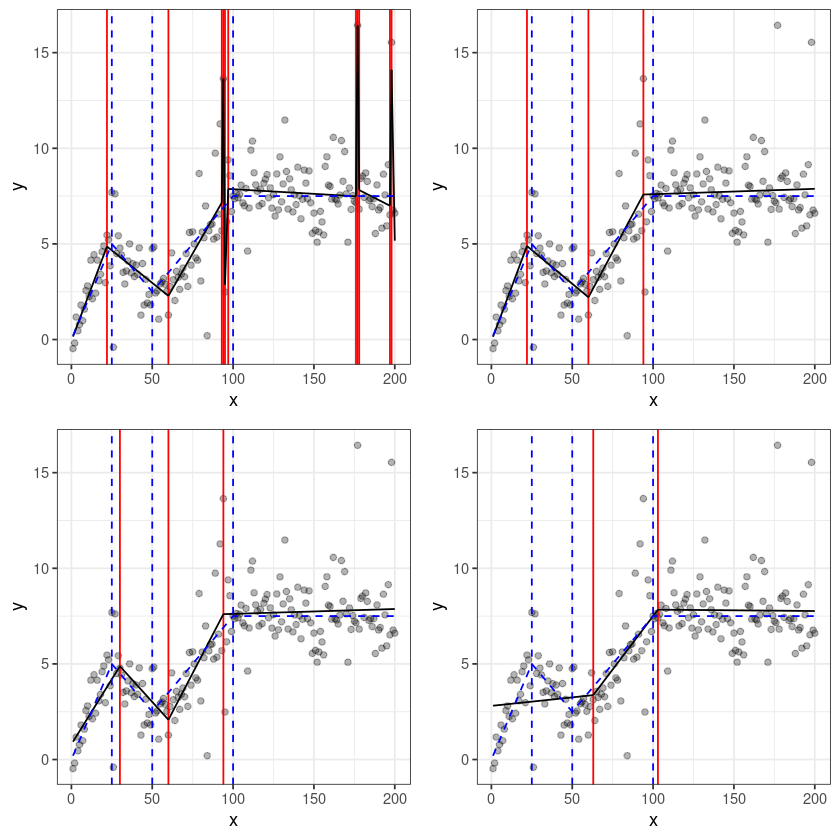

In [33]:
g <- grid.arrange(p.1,p.2,p.3,p.4 ,nrow = 2,ncol=2)

In [34]:
ggsave(file="cpop_minseg_ggplot.pdf", g)

Saving 6.67 x 6.67 in image



## Section 4.5

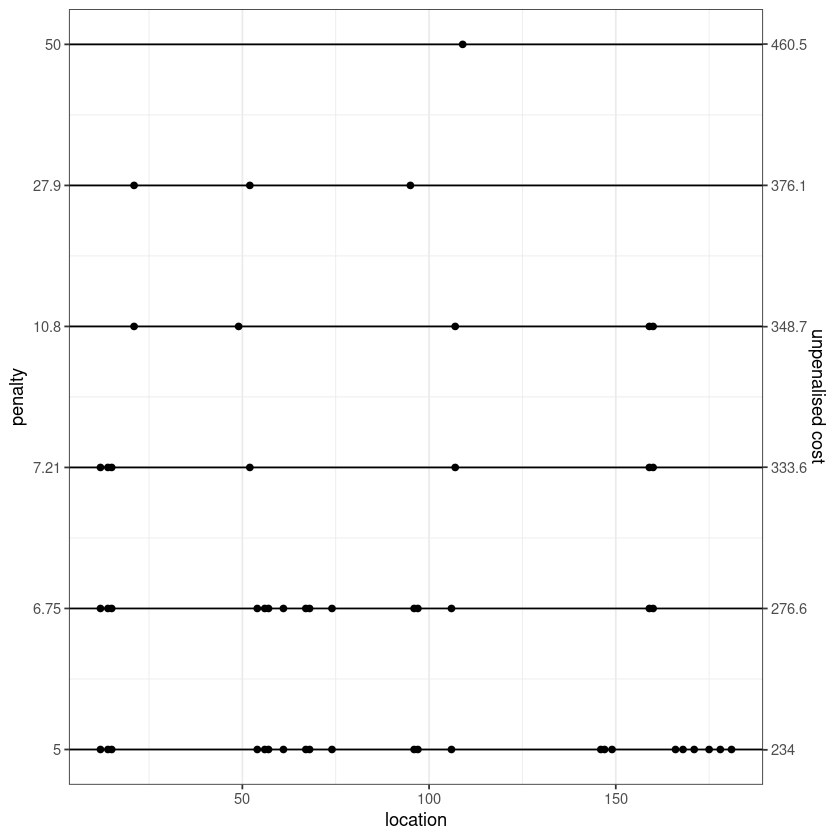

In [35]:
set.seed(1)
##simulate data as for Section 3
changepoints <- c(0, 25, 50, 100)
change.slope <- c(0.2, -0.3, 0.2, -0.1)
x <- 1:200
mu <- simchangeslope(x, changepoints, change.slope,  0) #mean
y <- simchangeslope(x, changepoints, change.slope, 1.5) #data with sd=1.5
###run crops
res.crops <- cpop.crops(y , x, beta_min= 5 ,beta_max= 50)
plot(res.crops)

In [36]:
##calculate the BIC under a model of unknown variance
models <- cpop.crops.models(res.crops)
M <- length(models)
BIC <- rep(NA, M)
ncps <- segmentations( res.crops )[,4]
n <- length(y)
for(i in 1:M){
  BIC[i] <- n*log( mean( ( residuals(models[[i]]) )^2) )+ 2 * ncps[i]  * log(n)
}


### Figure 8

Saving 6.67 x 6.67 in image



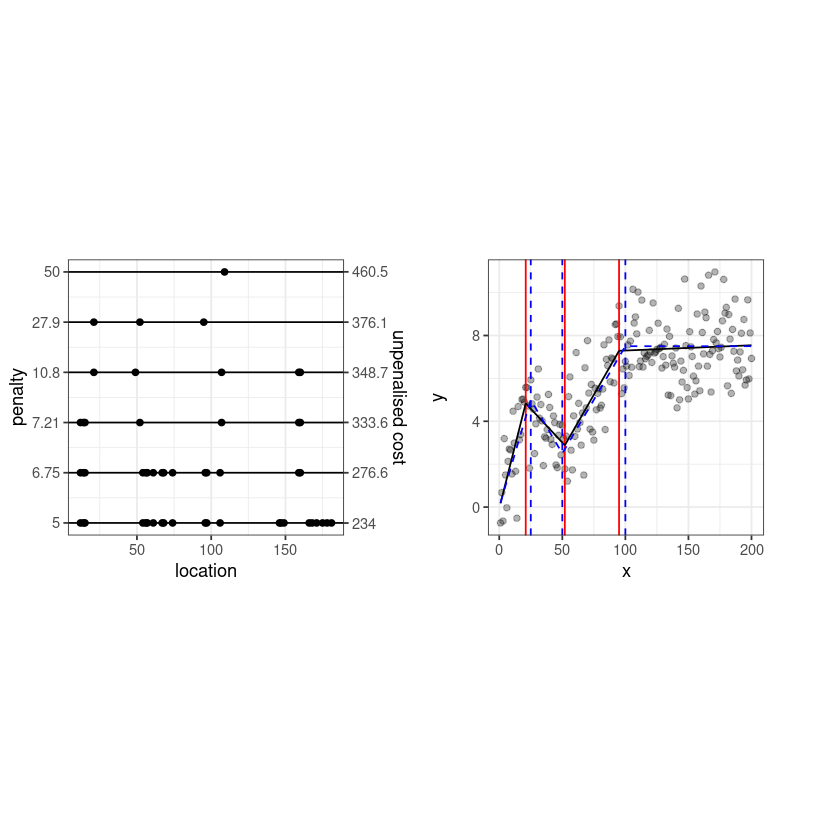

In [37]:
p.1 <- plot(res.crops)
i <- which.min(BIC)
p.2 <- plot(models[[i]])
p.2 <- p.2 + geom_vline(xintercept = changepoints[-1], color = "blue", linetype = "dashed")
p.2 <- p.2 + geom_line(aes(y = mu), color = "blue", linetype = "dashed")
p.1 <- p.1 + theme(aspect.ratio=1/1)
p.2 <- p.2 + theme(aspect.ratio=1/1)
library(cowplot)
g <- plot_grid(p.1, p.2, align = "v", nrow = 1)
ggsave(file="cpop_crops_example_ggplot.pdf",g)
plot(g)

In [38]:
set.seed(1)
n <- 500
x <- 1:n
mu <- simchangeslope(x,changepoints = 45*0:10,change.slope = c(0.15,0.3*(-1)^(1:10)) ,sd = 0)
epsilon <- rnorm(n+2)
y <- mu + (epsilon[1:n] + epsilon[2:(n+1)] + epsilon[3:(n+2)]) /sqrt(3)

In [39]:
res.crops <- cpop.crops(y,x,beta_min=8,beta_max=200)
segs <- segmentations(res.crops)

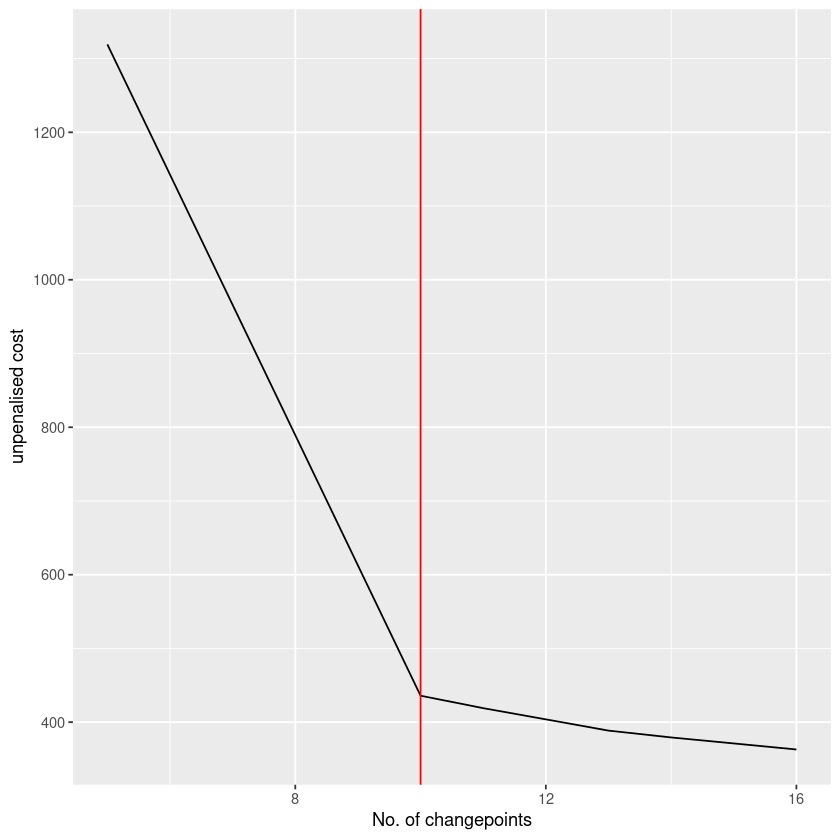

In [40]:
p <- ggplot(data = segs, aes(x = m))
p <- p + geom_line(aes(y = Qm))
p <- p + geom_vline(xintercept = 10,color = "red")
p <- p + xlab("No. of changepoints") + ylab("unpenalised cost")
plot(p)

### Figure 9

In [41]:
set.seed(1)
n <- 500
x <- 1:n
mu <- simchangeslope(x,changepoints = 45*0:10,change.slope = c(0.15,0.3*(-1)^(1:10)) ,sd = 0)
epsilon <- rnorm(n+2)
y <- mu + (epsilon[1:n] + epsilon[2:(n+1)] + epsilon[3:(n+2)]) /sqrt(3)
p.1 <- plot(res.crops)
p.2 <- p + theme_bw()
models <- cpop.crops.models(res.crops)
p <- plot(models[[5]])
p <- p + geom_vline(xintercept = 45*1:10, color = "blue", linetype = "dashed")
p.3 <- p + geom_line(aes(y = mu), color = "blue", linetype = "dashed")

Saving 6.67 x 6.67 in image



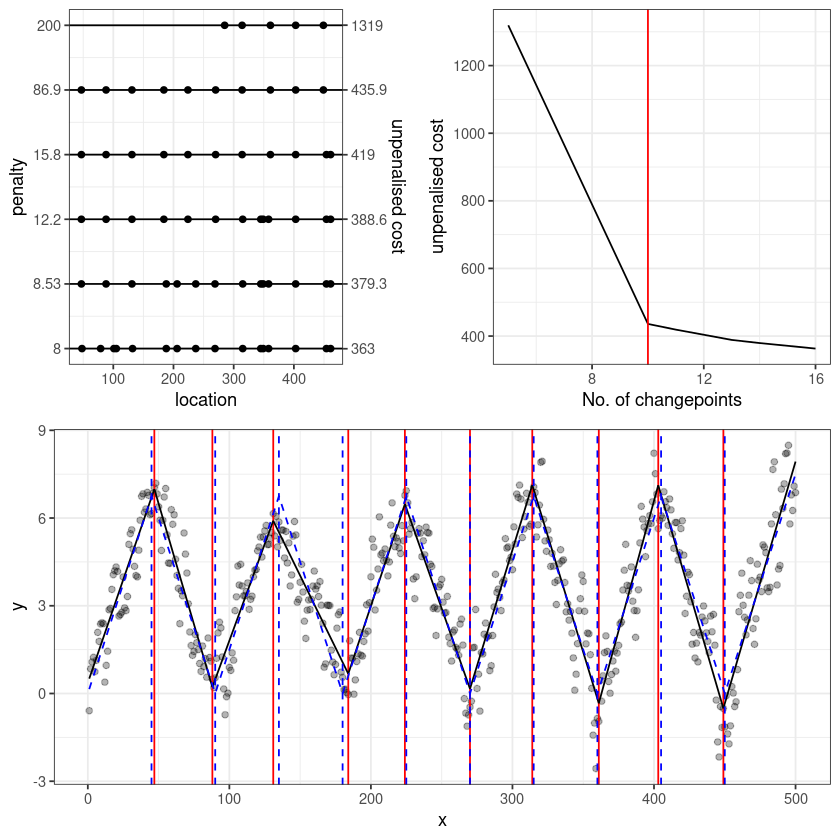

In [42]:
g <- grid.arrange(p.1,p.2,p.3,layout_matrix=rbind(c(1,2),c(3,3)))
ggsave(file="cpop_crops_ggplot.pdf",g)

## Section 5

In [43]:
data("wavenumber_spectra") ##Load data

##example for one curve -- fitting the decay.
x <- log(wavenumber_spectra[-(1:3),1],base=10)
y <- log(wavenumber_spectra[-(1:3),4],base=10)

grid <- seq(from=min(x),to=max(x),length=200)
##naive estimator of variance
sig2 <- mean( diff( diff(y) )^2 )/6 ##simple estimate of variance 

res <- cpop(y, x, grid, sd=sqrt(sig2), minseg = 0.09, beta=2*log(200))

In [44]:
r2 <- residuals(res)^2
##estimate variance as exp(a+bx)
##function for minus twice log-likelihood
loglik <- function(par){ 
  return(length(r2) * par[1] + par[2] * sum(x) + sum( r2/ (exp(par[1]+par[2]*x) )) )
}

est.hat <- optim( c(0,0) , loglik)
sig2 <- exp(est.hat$par[1] + est.hat$par[2]*x)

res2 <- cpop(y, x, grid , sd=sqrt(sig2), minseg= 0.09, beta=2 * log(200))

### Figure 10

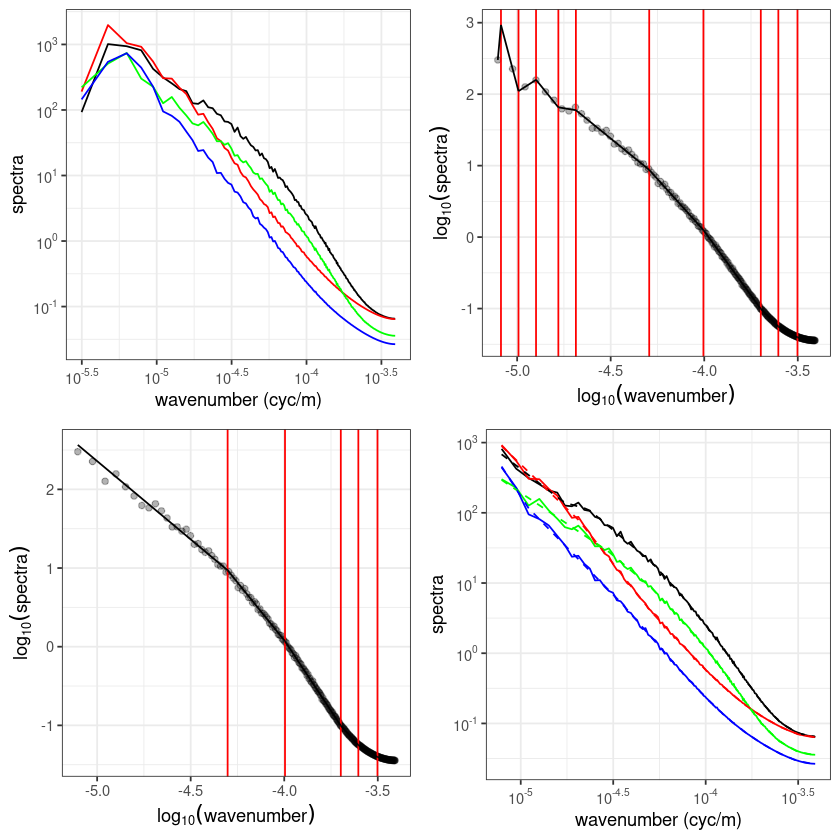

In [45]:
library(scales)
library(latex2exp)

######FUNCTION TO AUTOMATE THIS ANALYSIS
wavenumber_est <- function(x,y){
  grid <- seq(from=min(x),to=max(x),length=200)
  ##naive estimator of variance
  sig2 <- mean( diff( diff(y) )^2 )/6 ##simple estimate of variance 
  
  res <- cpop(y, x, grid, sd=sqrt(sig2), minseg = 0.09, beta=2*log(200))
 
  r2 <- residuals(res)^2
  est.hat <- optim( c(0,0) , loglik)
  sig2 <- exp(est.hat$par[1] + est.hat$par[2]*x)
  
  res2 <- cpop(y, x, grid , sd=sqrt(sig2), minseg = 0.09, beta=2 * log(200))
  
  return(res2)
}

y.est <- matrix(NA,nrow=4,ncol=length(x))
for(j in 1:4){
  est <- wavenumber_est(x, log(wavenumber_spectra[-(1:3),1+j]))
  y.est[j, ] <- estimate(est,x)[,2]
}

p <- ggplot(data = wavenumber_spectra, aes(x = wavenumber))
p <- p + geom_line(aes(y = power_spectra_Feb2000),color="black")
p <- p + geom_line(aes(y = power_spectra_Aug2000),color="red")
p <- p + geom_line(aes(y = power_spectra_Feb2100),color="green")
p <- p + geom_line(aes(y = power_spectra_Aug2100),color="blue")
# p <- p + scale_x_continuous(trans = 'log10')
p <- p + scale_x_continuous(trans = 'log10',breaks = trans_breaks("log10", function(x) 10^x),
    labels = trans_format("log10", math_format(10^.x)))
p <- p + scale_y_continuous(trans = 'log10',breaks = trans_breaks("log10", function(x) 10^x),
    labels = trans_format("log10", math_format(10^.x)))
# p <- p + xlab("wavenumber (cyc/m)") + ylab("log_10 spectra")
# p <- p + xlab("wavenumber (cyc/m)") +    ylab(TeX("$\\log_{10}$ spectra"))
p <- p + xlab("wavenumber (cyc/m)") +    ylab("spectra")                            
p.1 <- p + theme_bw()

p.2 <- plot(res)
p.2 <- p.2 + xlab(TeX("$\\log_{10}(wavenumber)$")) +    ylab(TeX("$\\log_{10}(spectra)$"))                            

p.3 <- plot(res2)
p.3 <- p.3 + xlab(TeX("$\\log_{10}(wavenumber)$")) +    ylab(TeX("$\\log_{10}(spectra)$")) 
#p.3 <- p.3 + scale_y_continuous(labels=function(.) sprintf("%.1f", .))

df <- wavenumber_spectra[-(1:3),]
p <- ggplot(data = df, aes(x = wavenumber))
p <- p + geom_line(aes(y = power_spectra_Feb2000),color="black")
p <- p + geom_line(aes(y = power_spectra_Aug2000),color="red")
p <- p + geom_line(aes(y = power_spectra_Feb2100),color="green")
p <- p + geom_line(aes(y = power_spectra_Aug2100),color="blue")
p <- p + geom_line(aes(y = exp(y.est[1,])),color="black",linetype="dashed")
p <- p + geom_line(aes(y = exp(y.est[2,])),color="red",linetype="dashed")
p <- p + geom_line(aes(y = exp(y.est[3,])),color="green",linetype="dashed")
p <- p + geom_line(aes(y = exp(y.est[4,])),color="blue",linetype="dashed")
#p <- p + scale_x_continuous(trans = 'log10')
p <- p + scale_x_continuous(trans = 'log10',breaks = trans_breaks("log10", function(x) 10^x),
    labels = trans_format("log10", math_format(10^.x)))
p <- p + scale_y_continuous(trans = 'log10',breaks = trans_breaks("log10", function(x) 10^x),
    labels = trans_format("log10", math_format(10^.x)))
p <- p + xlab("wavenumber (cyc/m)") + ylab("spectra")
p.4 <- p + theme_bw()

g <- grid.arrange(p.1,p.2,p.3,p.4,nrow=2,ncol=2)

In [46]:
ggsave(file="cpop_real_data_ggplot.pdf",g)

Saving 6.67 x 6.67 in image

